Author: Stephan, `stephan.gabler@bayesimpact.org`
# ROME dataset (taxonomy of jobs)

This data is available on the [Pole Emploi website](http://www.pole-emploi.org/informations/open-data-pole-emploi-@/25799/view-category-25799.html) in different formats, so far we only use the XML versions. On a high level, this dataset describes jobs and its skills, activities, work environments and requirements. Jobs, activities and skills are organized in hierarchical structures, the jobs itself according to two different systems. Jobs, Skills and activities each have unique identifiers assigned.

## Four types of data in tree structures:

- Arborescence principale (main tree):
  - ~11000 jobs organized along 4 levels: 14 industries, 110 professional categories, 531 career descriptions
  - All have an unique job identifier
- Arborescence thématique (theme tree):
  - Classification of careers in 17 themes (ie. "engineering", "sports", "personal services")
  - -> Somewhat arbitrary (split by theme and not by industry), not all jobs are in there
  - Could help figure out the broad category of a job
  - Careers have a unique identifier
- Arborescence activités (activity tree): activities organized in a 5-level deep tree structure
  - Ontology of activities: ~9000 activities organized along 5 levels of conceptual categories
  - Exemple: Level 1 ("Giving information, advising people") > Level 2 ("Help a customer" / "Give an expert opinion" / "Identify client needs") > Level 3 ("Information that requires customer interaction" / "Explain a program") etc.
  - All have an unique skills identifier
- Arborescence compétences (skill tree): skills organized in a 4-level deep tree structure
  - Ontology of skills: ~2700 skills
  - Note: there's a difference between activities ("give advice on funeral services to families") and skills ("financial analysis", "accounting", "typing skills", "neutralizing explosives")
  - Example: Level 1 ("Scientific knowledge", "Arts and literature knowledge") > Level 2 ("Economics" / "Electrical engineering" / "Mathematics")
  - Ontology is somewhat arbitrary, some fields have more granular information (e.g. "Tool, vehicles, etc. proficiency" > "Tools" > "Machines, appliances" > "Knife sharpening"/"Weapons"/etc.) and not all subdivisions make sense
  
## Dataset of job_group descriptions (Les fiches métiers ROME):

- 531 XML files corresponding to the 531 careers in the main tree
- Ex: C 11 02 (insurance agent):
  - Some info about the job
  - The 18 subjobs in this career type ("insurance agent for life assurance"/"insurance agent for savings"/"insurance agent for healthcare")
  - Broad definition of the job: text paragraph
  - Job requirements: text paragraph (not a list)
  - List of the type of businesses that hire for this position
  - List of activities with title and OGR code (can link back to activities tree)
  - List of skills with title and OGR code (can link back to skills tree)
  - List of similar careers and growth opportunities (not necessarily very well made)

In [1]:
%matplotlib inline
from __future__ import division
import os

import matplotlib.pyplot as plt
import seaborn as sns

from bob_emploi.lib import read_data

data_folder = os.getenv('DATA_FOLDER')

In [2]:
fiche_dicts = read_data.load_fiches_from_xml(os.path.join(data_folder,  'rome/ficheMetierXml'))
rome = [read_data.fiche_extractor(f) for f in fiche_dicts]

## Basic job group stats

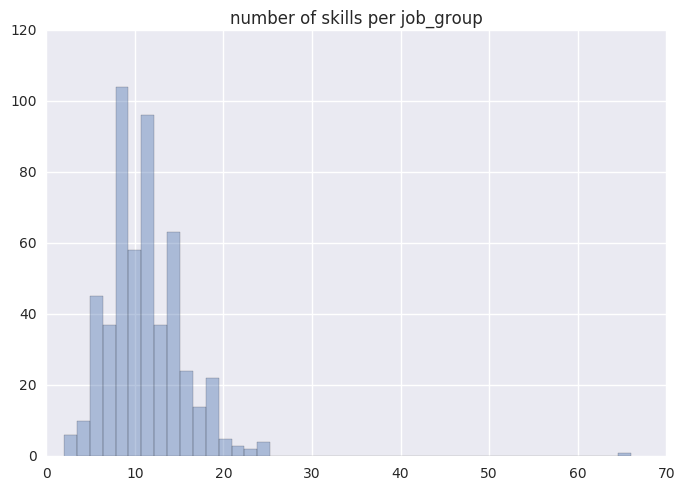

In [3]:
n_skills = [len(x['skills']) for x in rome]
ax = sns.distplot(n_skills, kde=False)
_ = ax.set_title('number of skills per job_group')

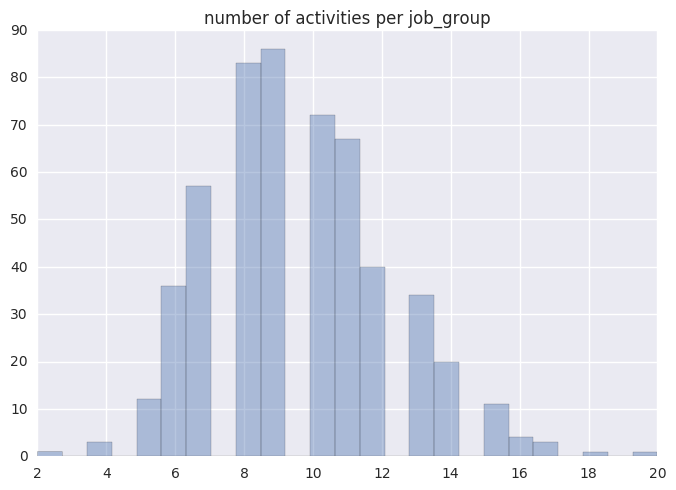

In [4]:
n_activities = [len(x['activities']) for x in rome]
ax = sns.distplot(n_activities, kde=False)
_ = ax.set_title('number of activities per job_group')

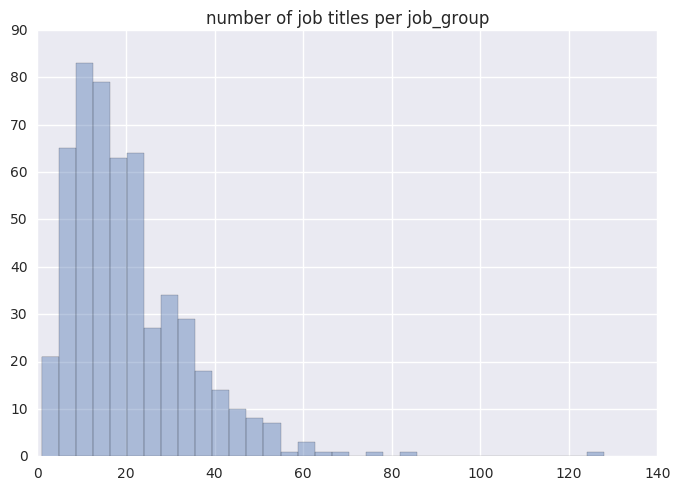

In [5]:
n_titles = [len(x['titles']) for x in rome]
ax = sns.distplot(n_titles, kde=False)
_ = ax.set_title('number of job titles per job_group')